# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

**Team Members:**

Madhav Reddy Betha (YY41695)

Rami Reddy Kancharla(OC12613)

In [ ]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english', max_features=2000)
corpus = vec.fit_transform(people.text)
corpus = corpus.toarray()

In [ ]:
corpus
vec.get_feature_names_out()

array(['10', '100', '11', ..., 'youngest', 'youth', 'zealand'],
      dtype=object)

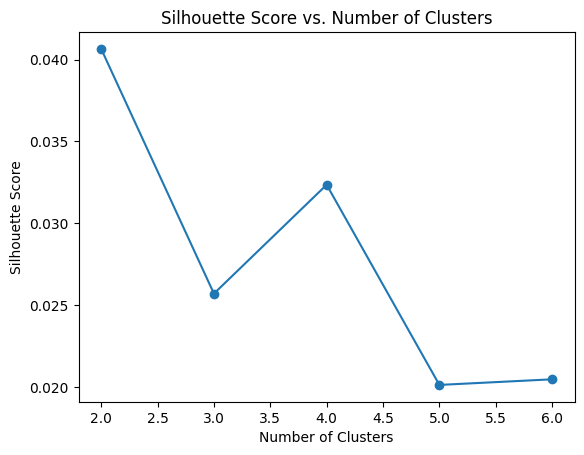

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

silhouette_scores = []
range_clusters = range(2, 7)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(corpus)
    score = silhouette_score(corpus, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

*From above showing silhouette plot, 5 is a good number of clusters because the silhouette score is higher than for 4 or 6 clusters."



In [ ]:
import numpy as np
import pandas as pd

optimal_k = 5
print(f"Optimal number of clusters: {optimal_k}")


top_terms = 10
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names_out()

# Print and identify potential labels for each cluster based on the top terms
cluster_labels = []
for i in range(optimal_k):
    print(f"Cluster {i}:")
    top_features = [terms[ind] for ind in order_centroids[i, :top_terms]]
    print(top_features)
    cluster_labels.append(top_features[0])

Optimal number of clusters: 5
Cluster 0:
['university', 'research', 'professor', 'new', 'american', 'school', 'international', 'college', 'national', 'science']
Cluster 1:
['born', 'new', 'world', 'university', 'work', 'years', 'american', 'won', 'including', 'series']
Cluster 2:
['member', 'served', 'party', 'born', 'election', 'president', 'university', 'state', 'minister', 'elected']
Cluster 3:
['season', 'league', 'played', 'team', 'football', 'games', 'career', 'born', 'coach', 'club']
Cluster 4:
['film', 'award', 'films', 'best', 'festival', 'television', 'director', 'new', 'directed', 'series']


In [ ]:
people['cluster'] = kmeans.labels_

for i in range(optimal_k):
    print(f"Cluster {i} examples:")
    examples = people[people.cluster == i].text.head(2)
    for example in examples:
        print(example[:500])
    print("\n---\n")

Cluster 0 examples:
cathy caruth born 1955 is frank h t rhodes professor of humane letters at cornell university and is appointed in the departments of english and comparative literature she taught previously at yale and at emory university where she helped build the department of comparative literature she received her phd from yale university in 1988 and is the author of empirical truths and critical fictions locke wordsworth kant freud johns hopkins up 1991 unclaimed experience trauma narrative and history johns
fr andrew pinsent born 19 august 1966 is research director of the ian ramsey centre for science and religion at oxford university a member of the theology faculty a research fellow of harris manchester college and a catholic priest of the diocese of arundel and brighton in england a focus of his present research is the application of insights from autism and social cognition to secondperson accounts of moral perception and character formation his previous scientific research